<a href="https://colab.research.google.com/github/EtienneNtumba/Assignment-AMMI/blob/main/debby_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Ecrit un modele de XGBoost pour prédire des données ayant trois variables quantitatives et un outcomes,

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Create sample data (replace with your actual data)
np.random.seed(0)
n_samples = 100
data = {
    'var1': np.random.rand(n_samples),
    'var2': np.random.rand(n_samples),
    'var3': np.random.rand(n_samples),
    'outcome': np.random.randint(0, 2, n_samples) # Binary outcome (0 or 1)
}
df = pd.DataFrame(data)

# Separate features and target variable
X = df[['var1', 'var2', 'var3']]
y = df['outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42) # Use binary:logistic for binary classification
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Example prediction for new data
new_data = pd.DataFrame({'var1': [0.5], 'var2': [0.3], 'var3': [0.8]})
prediction = model.predict(new_data)
print(f"Prediction for new data: {prediction}")

Accuracy: 0.55
Prediction for new data: [0]


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Exemple de données
data = pd.DataFrame({
    'x1': [1, 2, 3, 4],
    'x2': [2, 4, 6, 8],
    'x3': [3, 6, 9, 12],
    'Y': [10, 20, 30, 40]
})

# Variables explicatives et variable cible
X = data[['x1', 'x2', 'x3']]  # Matrice des features
y = data['Y']                 # Variable cible

# Ajustement du modèle
model = LinearRegression()
model.fit(X, y)

# Afficher les coefficients estimés
print("Intercept :", model.intercept_)
print("Coefficients :", model.coef_)

# Faire une prédiction
new_data = np.array([[5, 10, 15]])  # Exemple de nouvelle observation
prediction = model.predict(new_data)
print("Prediction for new data:", prediction)


Intercept : 7.105427357601002e-15
Coefficients : [0.71428571 1.42857143 2.14285714]
Prediction for new data: [50.]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [20]:
data.shape


(506, 13)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Utilisation du dataset Boston Housing (disponible via scikit-learn)
#from sklearn.datasets import load_boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]




# Charger le dataset
#boston = load_boston()
#data = pd.DataFrame(boston.data, columns=boston.feature_names)

# Ajouter la colonne cible (Y)
#data['PRICE'] = boston.target

# Prendre un sous-ensemble du dataset avec des variables numériques
# Utilisation de trois variables explicatives pour simplifier
subset = data[['RM', 'LSTAT', 'PTRATIO', 'PRICE']]  # RM, LSTAT, PTRATIO sont numériques

# Séparation des variables explicatives (X) et de la variable cible (Y)
X = subset[['RM', 'LSTAT', 'PTRATIO']]
Y = subset['PRICE']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, Y_train)

# Prédire sur les données de test
Y_pred = model.predict(X_test)

# Coefficients du modèle
coefficients = model.coef_
intercept = model.intercept_

# Évaluation du modèle
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Affichage des résultats
print("Intercept :", intercept)
print("Coefficients :", coefficients)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Plot : Comparaison entre les valeurs prédites et les valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7, label='Prédictions vs Réel')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', label='Ligne parfaite')
plt.xlabel('Valeurs réelles (Y_test)')
plt.ylabel('Valeurs prédites (Y_pred)')
plt.title('Comparaison des valeurs réelles et prédites')
plt.legend()
plt.grid()
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Charger les données Boston
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target  # Ajouter la colonne cible

# Vérifier les colonnes disponibles
print(data.columns)

# Sélectionner les colonnes pertinentes
subset = data[['RM', 'LSTAT', 'PTRATIO', 'PRICE']]

# Variables explicatives et cible
X = subset[['RM', 'LSTAT', 'PTRATIO']]
y = subset['PRICE']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [3]:
!pip install --upgrade scikit-learn


In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Charger le jeu de données California Housing
housing = fetch_california_housing(as_frame=True)
data = housing.data
data['PRICE'] = housing.target  # Ajouter la cible au DataFrame

# Afficher les colonnes disponibles
print(data.columns)

# Sélectionner les colonnes pertinentes
subset = data[['MedInc', 'AveRooms', 'AveOccup', 'PRICE']]  # Exemple avec 3 prédicteurs

# Variables explicatives et cible
X = subset[['MedInc', 'AveRooms', 'AveOccup']]
y = subset['PRICE']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Résumé des coefficients
for i, col in enumerate(X.columns):
    print(f"Coefficient for {col}: {model.coef_[i]:.2f}")


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')
Mean Squared Error: 0.70
Intercept: 0.6081056931392581
Coefficients: [ 0.43688279 -0.04042962 -0.00382602]
Coefficient for MedInc: 0.44
Coefficient for AveRooms: -0.04
Coefficient for AveOccup: -0.00


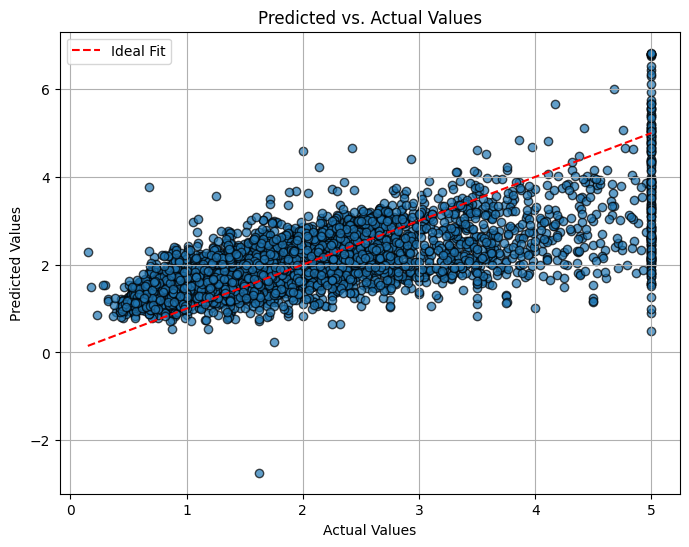

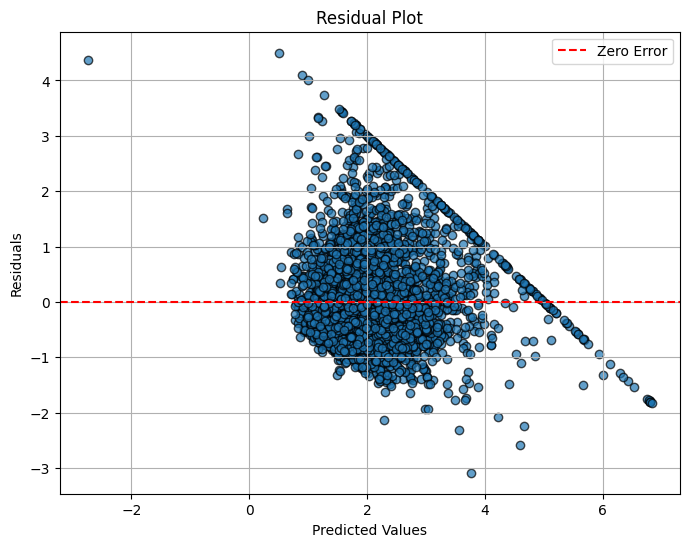

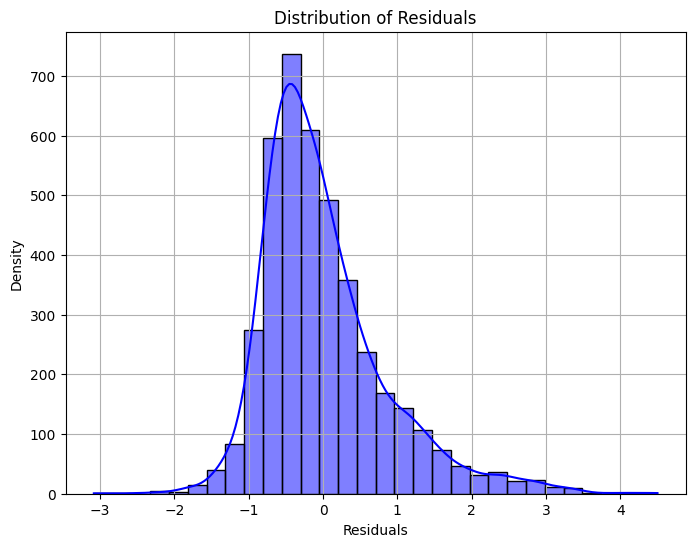

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the California Housing Dataset
housing = fetch_california_housing(as_frame=True)
data = housing.data
data['PRICE'] = housing.target

# Select features and target variable
subset = data[['MedInc', 'AveRooms', 'AveOccup', 'PRICE']]
X = subset[['MedInc', 'AveRooms', 'AveOccup']]
y = subset['PRICE']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Plot 1: Predicted vs. Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Fit')
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Plot 2: Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='r', linestyle='--', label="Zero Error")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Plot 3: Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.grid()
plt.show()


[0]	train-rmse:1.11277	eval-rmse:1.10567
[10]	train-rmse:0.77096	eval-rmse:0.79980
[20]	train-rmse:0.57008	eval-rmse:0.64043
[30]	train-rmse:0.44878	eval-rmse:0.55813
[40]	train-rmse:0.37469	eval-rmse:0.51271
[50]	train-rmse:0.33047	eval-rmse:0.49097
[60]	train-rmse:0.29911	eval-rmse:0.47967
[70]	train-rmse:0.27611	eval-rmse:0.47157
[80]	train-rmse:0.25913	eval-rmse:0.46446
[90]	train-rmse:0.24724	eval-rmse:0.46103
[99]	train-rmse:0.23663	eval-rmse:0.45785
Mean Squared Error (MSE): 0.21
R-squared (R2): 0.84


<Figure size 1000x800 with 0 Axes>

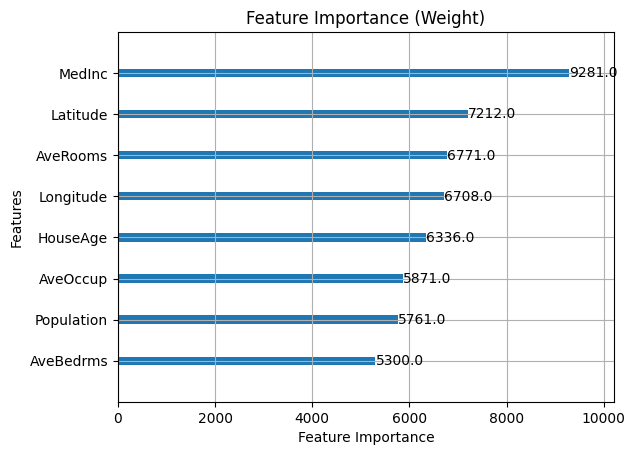

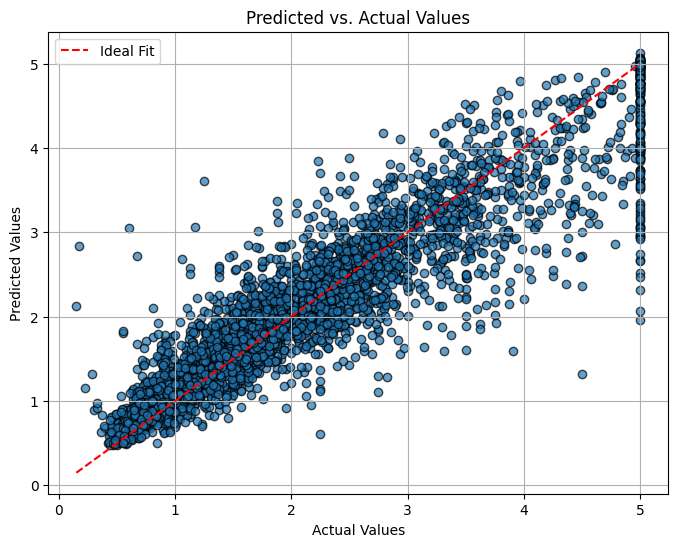

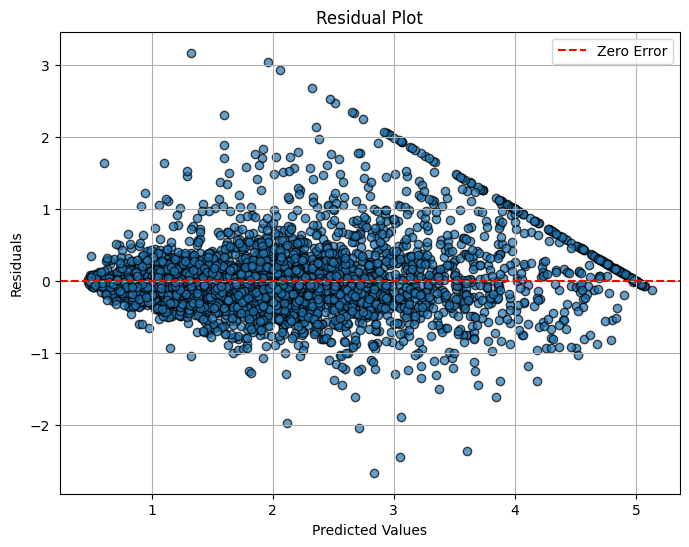

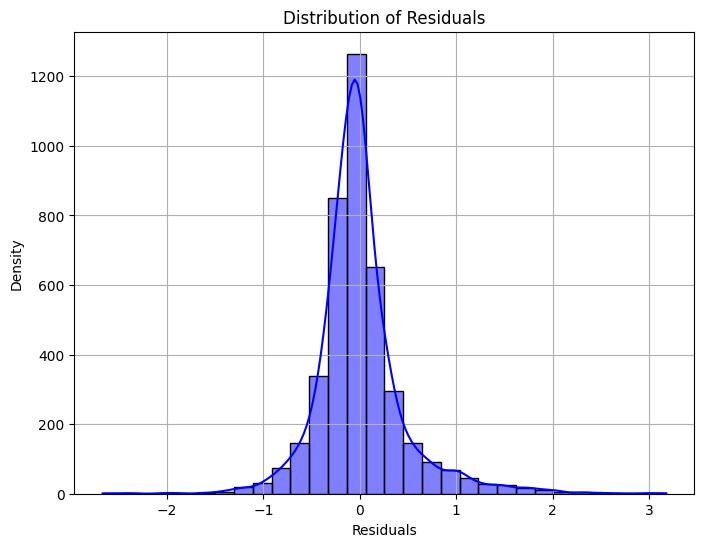


Feature Importance:

      Feature  Importance
0      MedInc      9281.0
6    Latitude      7212.0
2    AveRooms      6771.0
7   Longitude      6708.0
1    HouseAge      6336.0
5    AveOccup      5871.0
4  Population      5761.0
3   AveBedrms      5300.0


In [12]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the California Housing Dataset
housing = fetch_california_housing(as_frame=True)
data = housing.data
data['PRICE'] = housing.target

# Features and target
X = data.drop('PRICE', axis=1)
y = data['PRICE']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost model parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.05,
    'max_depth': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train the XGBoost model
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10, verbose_eval=10)

# Predict and evaluate the model
y_pred = xgb_model.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot 1: Feature Importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', xlabel='Feature Importance', show_values=True)
plt.title('Feature Importance (Weight)')
plt.show()

# Plot 2: Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Fit')
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid()
plt.show()

# Plot 3: Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='r', linestyle='--', label="Zero Error")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.grid()
plt.show()

# Plot 4: Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.grid()
plt.show()

# Display feature importance as a DataFrame
feature_importance = xgb_model.get_score(importance_type='weight')
importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n")
print(importance_df)
